In [96]:
import torch
print(torch.cuda.is_available())  # Should print True
print(torch.cuda.get_device_name(0))  # Prints GPU name


True
NVIDIA GeForce GTX 1650


In [97]:
import pandas as pd
import numpy as np
import torch
import requests
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from datetime import datetime
import os

# Set device for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [98]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [99]:
# Step 2: Load the dataset
df = pd.read_csv("augmented_Crop_recommendation.csv")

# Step 3: Separate features and target
X = df.drop('label', axis=1)     # Features: N, P, K, temperature, humidity, ph, rainfall
y = df['label'] 

In [100]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Optional: View class labels
print("Crop classes:", label_encoder.classes_)

Crop classes: ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']


In [101]:
# Step 5: Normalize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [102]:
# Step 6: Split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [103]:
# Step 7: Output shapes for confirmation
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("Number of crop classes:", len(label_encoder.classes_))

X_train shape: (4000, 7)
X_test shape: (1000, 7)
y_train shape: (4000,)
y_test shape: (1000,)
Number of crop classes: 22


In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

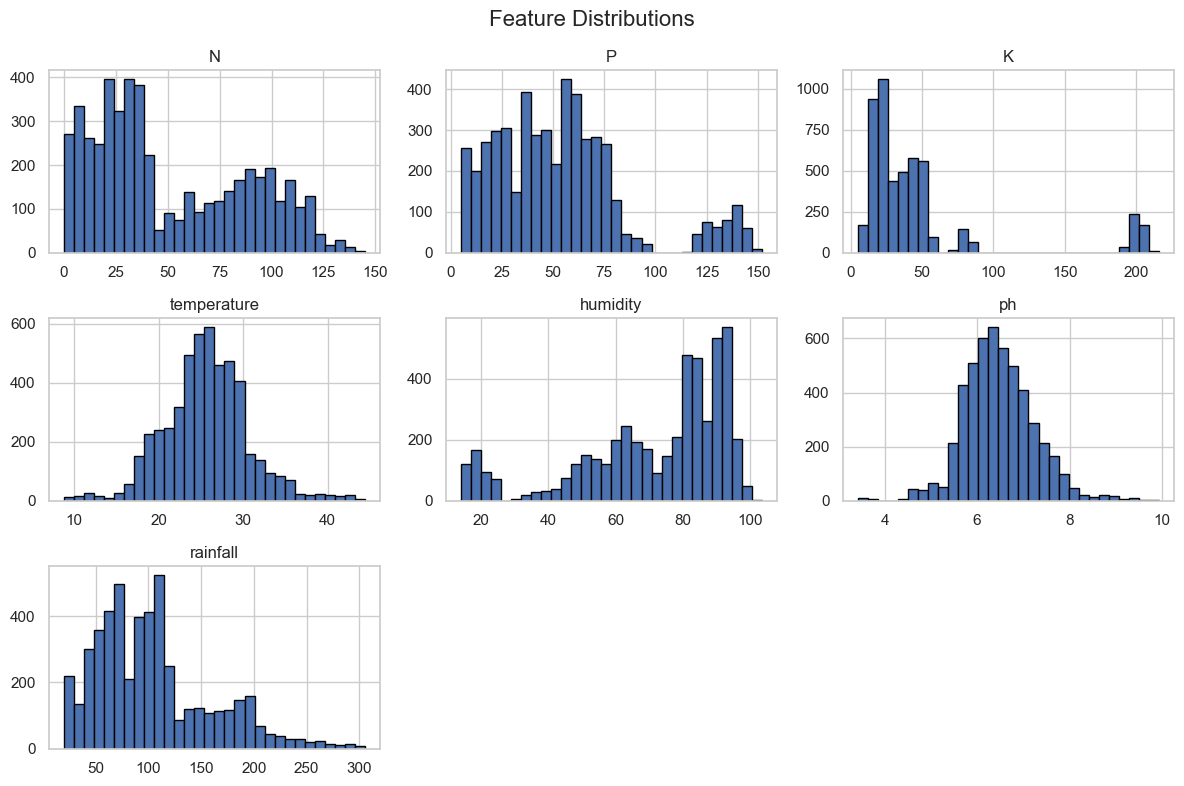

In [105]:
# 1. Histogram of numerical features
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

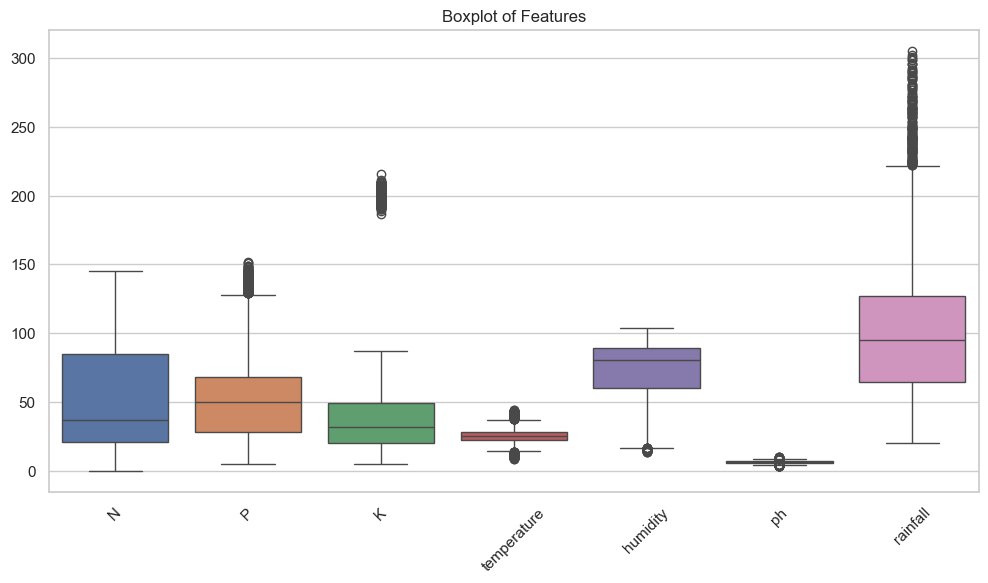

In [106]:
# 2. Boxplot for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop("label", axis=1))
plt.title("Boxplot of Features")
plt.xticks(rotation=45)
plt.show()

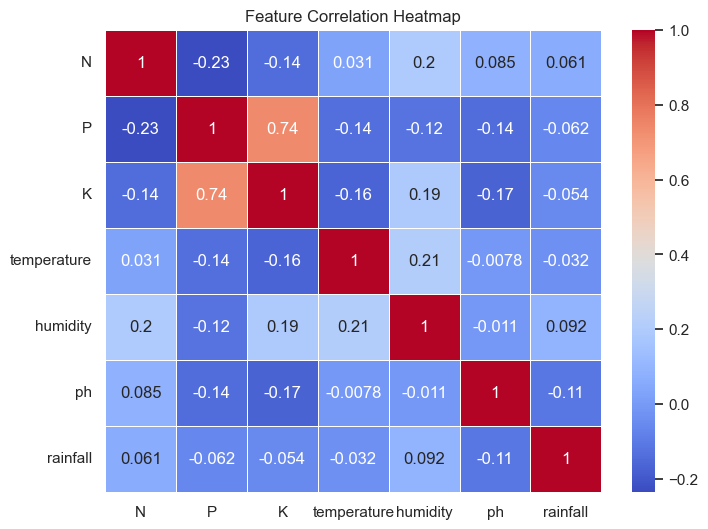

In [107]:
plt.figure(figsize=(8, 6))
corr = df.drop("label", axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

RANDOM FOREST CLASSIFIER 

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [109]:
y_pred = rf_model.predict(X_test)

In [110]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy: {accuracy:.4f}\n")
print("📄 Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


✅ Accuracy: 0.9990

📄 Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        45
      banana       1.00      1.00      1.00        46
   blackgram       1.00      1.00      1.00        45
    chickpea       1.00      1.00      1.00        45
     coconut       1.00      1.00      1.00        46
      coffee       1.00      1.00      1.00        45
      cotton       1.00      1.00      1.00        46
      grapes       1.00      1.00      1.00        45
        jute       1.00      1.00      1.00        46
 kidneybeans       1.00      1.00      1.00        46
      lentil       0.98      1.00      0.99        45
       maize       1.00      1.00      1.00        46
       mango       1.00      1.00      1.00        45
   mothbeans       1.00      0.98      0.99        45
    mungbean       1.00      1.00      1.00        45
   muskmelon       1.00      1.00      1.00        45
      orange       1.00      1.00  

C:\Users\mohit\AppData\Local\Temp\ipykernel_2952\3850756750.py:12: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
m:\DL\.conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


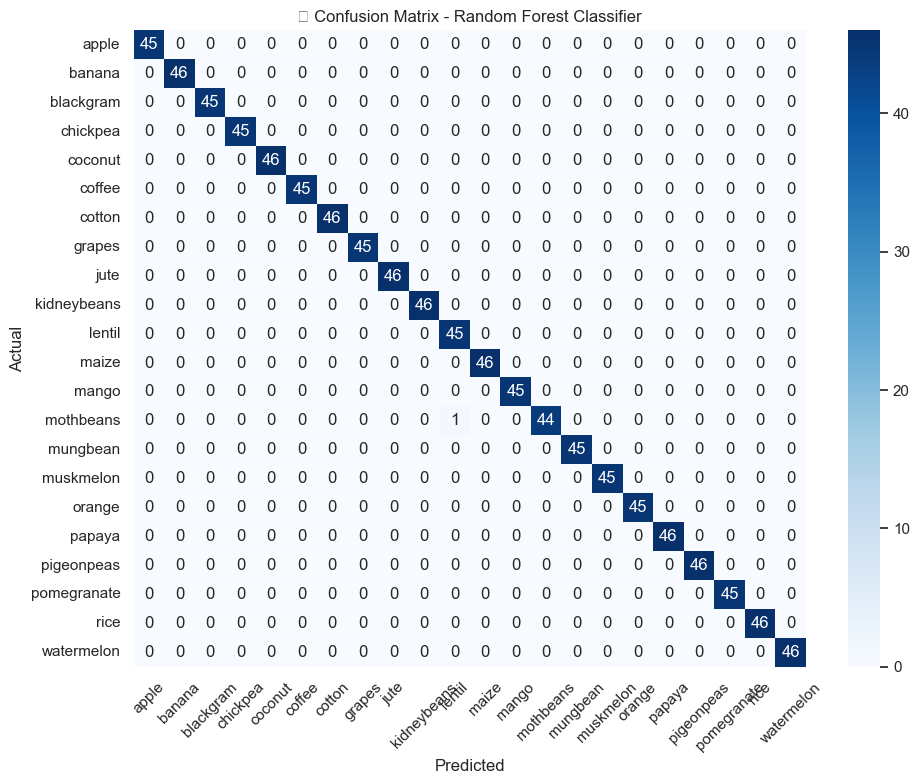

In [172]:


# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cmap='Blues')
plt.title("🔍 Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\mohit\AppData\Local\Temp\ipykernel_2952\245824523.py:11: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  plt.tight_layout()
m:\DL\.conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


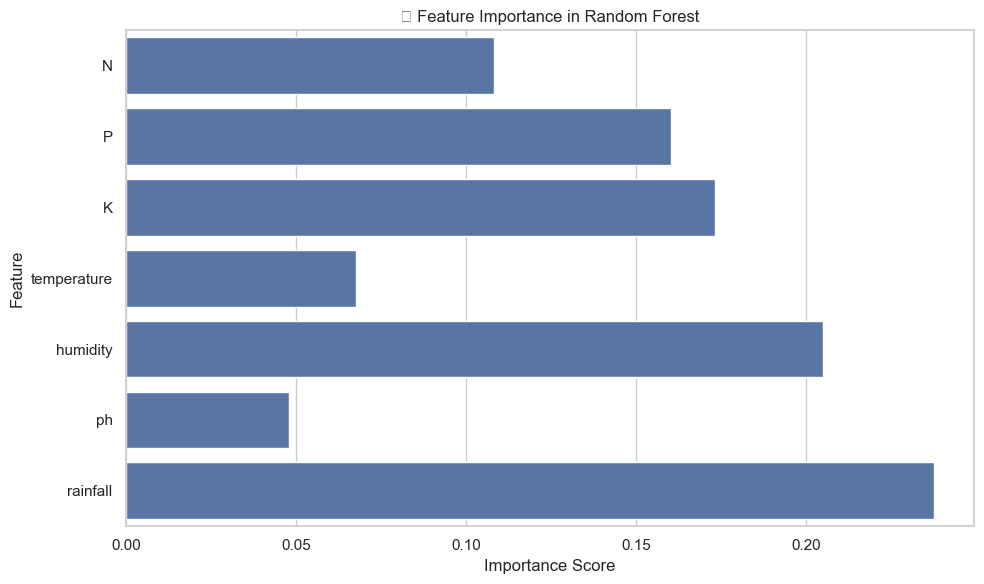

In [112]:
# Feature Importance Plot
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title("🌾 Feature Importance in Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

RNN

In [113]:
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
X_reshaped = X_scaled.reshape(-1, 7, 1)
# Convert to tensors
X_tensor = torch.tensor(X_reshaped, dtype=torch.float32)
y_tensor = torch.tensor(y_encoded, dtype=torch.long)
X_train, X_test, y_train, y_test = train_test_split(
    X_tensor, y_tensor, test_size=0.2, random_state=42, stratify=y_encoded
)

In [114]:
# Create Dataloaders
train_ds = TensorDataset(X_train, y_train)
test_ds = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=32)

In [115]:
# Define LSTM Classifier
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        out = self.fc(h_n[-1])
        return out

In [116]:
# Model parameters
input_size = 1
hidden_size = 64
num_layers = 1
num_classes = len(label_encoder.classes_)

In [157]:
model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes).to(device)

In [158]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [159]:
# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [1/5], Loss: 2.0229
Epoch [2/5], Loss: 1.2537
Epoch [3/5], Loss: 1.0318
Epoch [4/5], Loss: 0.5280
Epoch [5/5], Loss: 0.4420


In [160]:
#Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs = model(batch_X)
        _, predicted = torch.max(outputs.data, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

print(f"\n✅ LSTM Test Accuracy: {100 * correct / total:.2f}%")


✅ LSTM Test Accuracy: 90.20%


📄 Classification Report (LSTM):
              precision    recall  f1-score   support

       apple       1.00      0.96      0.98        45
      banana       1.00      1.00      1.00        46
   blackgram       0.67      0.91      0.77        45
    chickpea       0.85      1.00      0.92        45
     coconut       0.94      0.98      0.96        46
      coffee       0.96      0.98      0.97        45
      cotton       0.98      0.98      0.98        46
      grapes       0.96      1.00      0.98        45
        jute       0.83      0.96      0.89        46
 kidneybeans       0.93      0.87      0.90        46
      lentil       0.79      0.73      0.76        45
       maize       1.00      0.96      0.98        46
       mango       0.86      0.93      0.89        45
   mothbeans       0.93      0.56      0.69        45
    mungbean       0.83      0.96      0.89        45
   muskmelon       0.96      0.98      0.97        45
      orange       0.93      0.82      0.87      

C:\Users\mohit\AppData\Local\Temp\ipykernel_2952\2052679655.py:39: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
m:\DL\.conda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


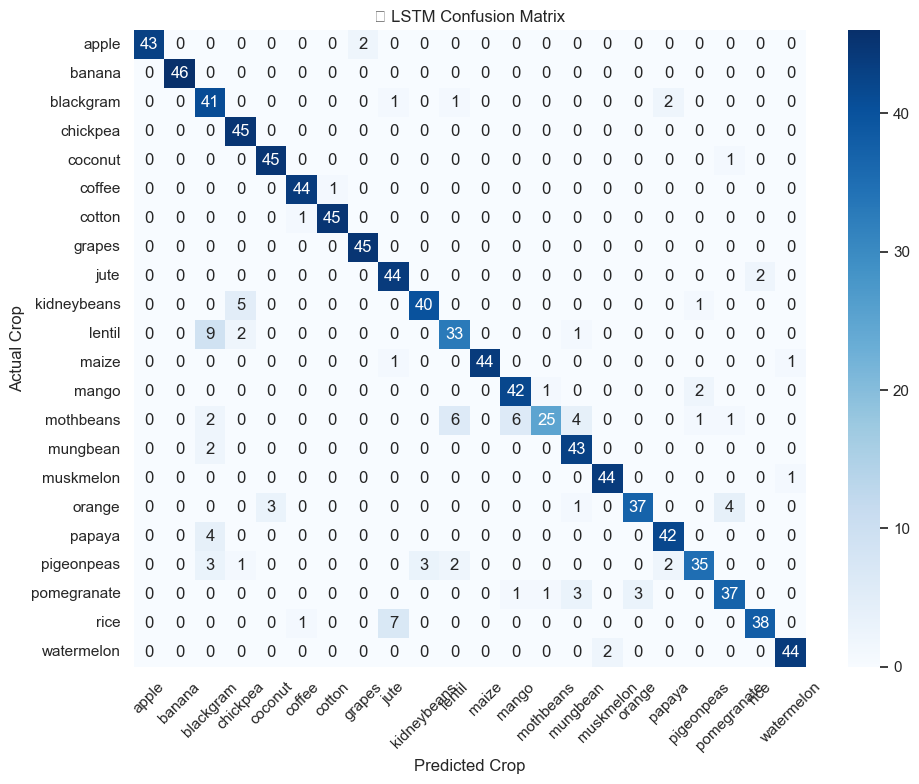

In [161]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import torch

# Switch model to evaluation mode
model.eval()

# Store predictions and labels
all_preds = []
all_labels = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs = model(batch_X)
        _, predicted = torch.max(outputs, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(batch_y.cpu().numpy())

# Generate classification report
print("📄 Classification Report (LSTM):")
print(classification_report(all_labels, all_preds, target_names=label_encoder.classes_))

# Generate confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("📊 LSTM Confusion Matrix")
plt.xlabel("Predicted Crop")
plt.ylabel("Actual Crop")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [163]:
import torch

def recommend_crop_lstm(model, scaler, label_encoder, input_data, device='cuda'):
    """
    Recommend a crop using the trained LSTM model on GPU.
    
    input_data: list or array of 7 values [N, P, K, temperature, humidity, ph, rainfall]
    """
    # Normalize and reshape input
    input_scaled = scaler.transform([input_data])
    input_sequence = torch.tensor(input_scaled.reshape(1, 7, 1), dtype=torch.float32).to(device)
    
    # Predict
    model.eval()
    with torch.no_grad():
        output = model(input_sequence)
        _, predicted = torch.max(output, 1)
    
    crop = label_encoder.inverse_transform([predicted.cpu().item()])[0]
    return crop

# 🔍 Example usage:
input_example = [100, 10, 0, 0.5, 11, 6.5, 100]  # Replace with actual inputs
recommended_crop_lstm = recommend_crop_lstm(model, scaler, label_encoder, input_example, device=device)
print("✅ Recommended Crop (LSTM):", recommended_crop_lstm)

✅ Recommended Crop (LSTM): kidneybeans


m:\DL\.conda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle
import os

# Create models directory if it doesn't exist
MODEL_DIR = 'models'
if not os.path.exists(MODEL_DIR):
    os.makedirs(MODEL_DIR)

# Define paths for saving models
RF_MODEL_PATH = os.path.join(MODEL_DIR, 'rf_model.pkl')
LSTM_MODEL_PATH = os.path.join(MODEL_DIR, 'lstm_model.pth')
SCALER_PATH = os.path.join(MODEL_DIR, 'scaler.pkl')
LABEL_ENCODER_PATH = os.path.join(MODEL_DIR, 'label_encoder.pkl')

# Ensure X_train and X_test are 2D for Random Forest
print("Original X_train shape:", X_train.shape)
print("Original X_test shape:", X_test.shape)
if len(X_train.shape) > 2:
    X_train = X_train.reshape(X_train.shape[0], -1)  # (4000, 7)
    X_test = X_test.reshape(X_test.shape[0], -1)    # (1000, 7)
print("X_train shape after reshape:", X_train.shape)
print("X_test shape after reshape:", X_test.shape)
assert len(X_train.shape) == 2, "X_train must be 2D for Random Forest"
assert len(X_test.shape) == 2, "X_test must be 2D for Random Forest"

# Ensure y_train and y_test are NumPy arrays
if isinstance(y_train, torch.Tensor):
    y_train = y_train.cpu().numpy()
if isinstance(y_test, torch.Tensor):
    y_test = y_test.cpu().numpy()
print("y_train type:", type(y_train), "shape:", y_train.shape)
print("y_test type:", type(y_test), "shape:", y_test.shape)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Random Forest
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)
# Convert predictions to NumPy arrays explicitly
rf_train_pred = np.array(rf_train_pred)
rf_test_pred = np.array(rf_test_pred)
print("RF Training Accuracy:", accuracy_score(y_train, rf_train_pred))
print("RF Test Accuracy:", accuracy_score(y_test, rf_test_pred))

# Save Random Forest model
with open(RF_MODEL_PATH, 'wb') as f:
    pickle.dump(rf_model, f)

# Save preprocessing objects
with open(SCALER_PATH, 'wb') as f:
    pickle.dump(scaler, f)
with open(LABEL_ENCODER_PATH, 'wb') as f:
    pickle.dump(label_encoder, f)

# Define LSTM model (matches app.py)
class LSTMModel(nn.Module):
    def __init__(self, input_size=7, hidden_size=64, num_layers=2, num_classes=22):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Prepare 3D data for LSTM
X_train_lstm = X_train.reshape(-1, 1, 7) 
X_test_lstm = X_test.reshape(-1, 1, 7)   
print("X_train_lstm shape for LSTM:", X_train_lstm.shape)
print("X_test_lstm shape for LSTM:", X_test_lstm.shape)

# Convert to PyTorch tensors
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.FloatTensor(X_train_lstm).to(device)
y_train_tensor = torch.LongTensor(y_train).to(device)
X_test_tensor = torch.FloatTensor(X_test_lstm).to(device)
y_test_tensor = torch.LongTensor(y_test).to(device)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Initialize LSTM model, loss, and optimizer
lstm_model = LSTMModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(lstm_model.parameters(), lr=0.001)

# Train LSTM
epochs = 5
for epoch in range(epochs):
    lstm_model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = lstm_model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch + 1}, Loss: {loss.item():.4f}")

# Evaluate LSTM
lstm_model.eval()
with torch.no_grad():
    train_outputs = lstm_model(X_train_tensor)
    test_outputs = lstm_model(X_test_tensor)
    train_pred = torch.argmax(train_outputs, dim=1).cpu().numpy()
    test_pred = torch.argmax(test_outputs, dim=1).cpu().numpy()
    print("LSTM Training Accuracy:", accuracy_score(y_train, train_pred))
    print("LSTM Test Accuracy:", accuracy_score(y_test, test_pred))

# Save LSTM model
torch.save(lstm_model.state_dict(), LSTM_MODEL_PATH)

Original X_train shape: torch.Size([4000, 7])
Original X_test shape: torch.Size([1000, 7])
X_train shape after reshape: torch.Size([4000, 7])
X_test shape after reshape: torch.Size([1000, 7])
y_train type: <class 'numpy.ndarray'> shape: (4000,)
y_test type: <class 'numpy.ndarray'> shape: (1000,)
RF Training Accuracy: 1.0
RF Test Accuracy: 0.999
X_train_lstm shape for LSTM: torch.Size([4000, 1, 7])
X_test_lstm shape for LSTM: torch.Size([1000, 1, 7])
Epoch 1, Loss: 2.2294
Epoch 2, Loss: 0.7358
Epoch 3, Loss: 0.3422
Epoch 4, Loss: 0.2321
Epoch 5, Loss: 0.1443
LSTM Training Accuracy: 0.96825
LSTM Test Accuracy: 0.966


In [180]:
import requests
url = 'http://127.0.0.1:5000/predict'
# Test Random Forest
data_rf = {
    "N": 90, "P": 40, "K": 40, "temperature": 24.5,
    "humidity": 80, "ph": 6.5, "rainfall": 200, "model": "rf"
}
print("RF Prediction:", requests.post(url, json=data_rf).json())
# Test LSTM
data_lstm = {
    "N": 100, "P": 50, "K": 50, "temperature": 25.0,
    "humidity": 85, "ph": 6.8, "rainfall": 180, "model": "lstm"
}
print("LSTM Prediction:", requests.post(url, json=data_lstm).json())

RF Prediction: {'confidence': 0.61, 'prediction': 'jute'}
LSTM Prediction: {'confidence': 0.7676135897636414, 'prediction': 'jute'}
